In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

# Indium-116m

In [3]:
t = 60 #One minute

In [4]:
Cbkd = 22 #Average background count
dCbkd = np.sqrt(Cbkd)
dCbkd

4.6904157598234297

In [5]:
Ctot = np.array([2184,1887,1782,1465,1278,1076,990,874,785,678,595,507,458])

In [6]:
Cnet = Ctot - Cbkd
Cnet

array([2162, 1865, 1760, 1443, 1256, 1054,  968,  852,  763,  656,  573,
        485,  436])

In [7]:
Rbkd = Cbkd/t
Rbkd

0.36666666666666664

In [8]:
dRbkd = 1/np.sqrt(Cbkd)
dRbkd

0.21320071635561041

In [9]:
R = np.array([entry/t for entry in Ctot])
R

array([ 36.4       ,  31.45      ,  29.7       ,  24.41666667,
        21.3       ,  17.93333333,  16.5       ,  14.56666667,
        13.08333333,  11.3       ,   9.91666667,   8.45      ,   7.63333333])

In [10]:
dR = np.array([np.sqrt(entry)/t for entry in Cnet])
dR

array([ 0.7749552 ,  0.71976076,  0.6992059 ,  0.633114  ,  0.59066817,
        0.54108944,  0.51854497,  0.48648398,  0.46037424,  0.42687495,
        0.39895697,  0.36704526,  0.34801022])

In [11]:
Rnet = np.array([entry - Rbkd for entry in R])
Rnet

array([ 36.03333333,  31.08333333,  29.33333333,  24.05      ,
        20.93333333,  17.56666667,  16.13333333,  14.2       ,
        12.71666667,  10.93333333,   9.55      ,   8.08333333,   7.26666667])

In [12]:
dRnet = np.sqrt(dR**2 + dRbkd**2)
dRnet

array([ 0.80374754,  0.7506731 ,  0.73098799,  0.66804781,  0.6279677 ,
        0.58157744,  0.56066339,  0.53115084,  0.50734504,  0.47715487,
        0.45235076,  0.42447234,  0.40812456])

In [13]:
dCnet = dRnet*t
dCnet

array([ 48.22485214,  45.04038592,  43.85927911,  40.08286871,
        37.6780621 ,  34.89464663,  33.63980326,  31.86905025,
        30.44070242,  28.62929206,  27.14104574,  25.46834042,  24.48747361])

### #1

In [14]:
Cnet

array([2162, 1865, 1760, 1443, 1256, 1054,  968,  852,  763,  656,  573,
        485,  436])

In [15]:
dCnet

array([ 48.22485214,  45.04038592,  43.85927911,  40.08286871,
        37.6780621 ,  34.89464663,  33.63980326,  31.86905025,
        30.44070242,  28.62929206,  27.14104574,  25.46834042,  24.48747361])

In [16]:
T = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120])

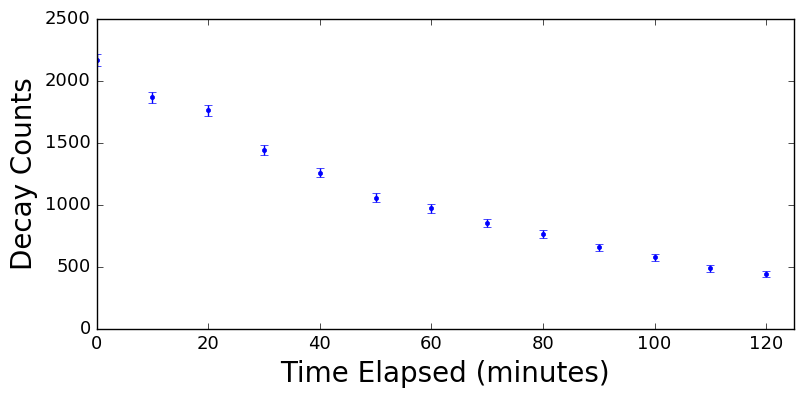

In [17]:
plt.figure(figsize=(9,4))
plt.errorbar(T, Cnet, yerr=dCnet,ls="None",marker='.');
plt.xlim(0,125);
plt.xlabel('Time Elapsed (minutes)',size=20);
plt.ylabel('Decay Counts',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);

### #2

In [18]:
y = np.array([np.log(entry) for entry in Cnet])
dy = np.array([1/np.sqrt(entry) for entry in Cnet])

In [19]:
dy #All positive

array([ 0.02150662,  0.02315584,  0.02383656,  0.02632491,  0.02821663,
        0.03080206,  0.03214122,  0.03425944,  0.03620243,  0.03904344,
        0.0417756 ,  0.04540766,  0.04789131])

### #3

In [20]:
def myfun(t,C_o,tau):
    ans = np.log(C_o) - t/tau  # this is y, "the function to be fit"
    return ans

In [21]:
p0 = [2200,60]

In [22]:
xlots = np.linspace(0,120)  # need lots of data points for smooth curve
yfit = np.zeros((len(T),xlots.size))

plsq, pcov = curve_fit(myfun, T, y, p0,dy)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C_o = plsq[0]
eC_o = np.sqrt(pcov[0,0])
tau = plsq[1]
etau = np.sqrt(pcov[1,1])


yfit = myfun(xlots,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('C_o = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('tau = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))

C_o = 2174 +/- 28
tau = 74.5 +/- 1.3


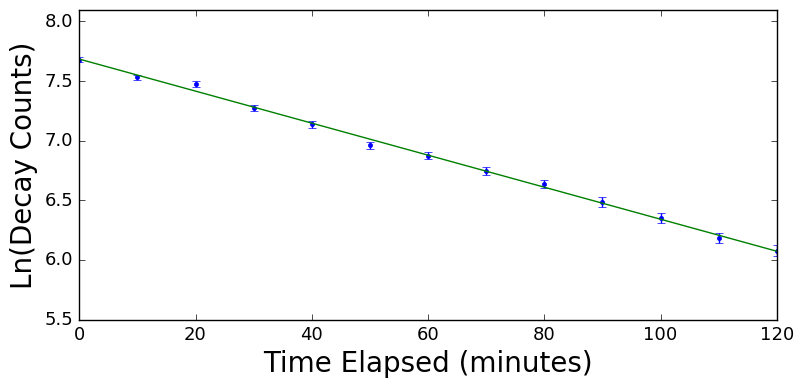

In [23]:
plt.figure(figsize=(9,4))
plt.errorbar(T, y, yerr=dy,ls="None",marker='.');
plt.xlim(0,120);
plt.ylim(5.5,8.1)
plt.xlabel('Time Elapsed (minutes)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(xlots,yfit);

### #4

In [24]:
Thalf = tau*np.log(2)
Thalf

51.612089523116637

In [25]:
dThalf = etau*np.log(2)
dThalf

0.90956843016693822

From wiki, the half life of Indium-116m is 54.29 minutes

### Silver

In [26]:
Data = np.loadtxt("Silver.mca")
Data

array([ 289.,  298.,  279.,  257.,  264.,  215.,  191.,  210.,  191.,
        170.,  151.,  134.,  141.,  129.,  124.,  107.,  122.,  108.,
         89.,  101.,   89.,  113.,   91.,   79.,   78.,   78.,   63.,
         81.,   73.,   57.,   81.,   66.,   83.,   65.,   65.,   71.,
         49.,   56.,   62.,   58.,   50.,   55.,   44.,   52.,   48.,
         41.,   48.,   45.,   38.,   43.,   47.,   49.,   39.,   35.,
         37.,   39.,   35.,   34.,   33.,   46.,   37.,   20.,   32.,
         28.,   33.,   31.,   31.,   31.,   32.,   29.,   25.,   27.,
         34.,   20.,   27.,   21.,   31.,   23.,   28.,   14.,   29.,
         24.,   30.,   23.,   18.,   27.,   25.,   17.,   18.,   23.,
         22.,   31.,   21.,   20.,   11.,   18.,   24.,   17.,   30.,
         21.,   17.,   13.,   18.,   14.,   11.,   24.,   13.,   21.,
         18.,   16.,   19.,   12.,   15.,   14.,   13.,   20.,   20.,
         14.,   12.,   13.,   12.,   10.,   11.,    6.,    5.,    5.,
          8.,    8.,

In [27]:
Data[210] #Signal is in the background

0.0

In [28]:
Data = Data[0:209]

In [29]:
Data.shape

(209,)

In [30]:
Bkd = np.loadtxt("Background.mca")
Bkd

array([ 0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        2.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,
        2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,
        0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  3.,  2.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0

In [31]:
Cavgbkd = np.mean(Bkd)
Cavgbkd

0.55859375

In [32]:
dCavgbkd = np.sqrt(Cavgbkd)
dCavgbkd

0.74739129644383739

In [33]:
Ravgbkd = Cavgbkd/4 #Four second channel
dRavgbkd = np.sqrt(Cavgbkd)/4

### #1

In [34]:
tau = 400*1e-6 #Dead time of geiger
def Correction(Cobs):
    Robs = Cobs/4 #4-second channels
    return Cobs/(1-Robs*tau)

In [35]:
CorrectData = np.array([Correction(entry) for entry in Data])
dCorrectData = np.array([np.sqrt(entry) for entry in CorrectData])

In [36]:
CorrectData.shape

(209,)

### #2

In [37]:
t = np.arange(0,4*len(Data),4) #seconds

In [38]:
t.shape

(209,)

In [39]:
LnC = np.array([np.log(entry) for entry in CorrectData]) #y = Ln(Cnet)
dLnC = np.array([1/np.sqrt(entry) for entry in CorrectData]) #dy = 1/root(Cnet)

In [40]:
LnC.shape

(209,)

In [41]:
icut = 25 #cutoff index where second line begins

In [42]:
t[icut] #Second line begins

100

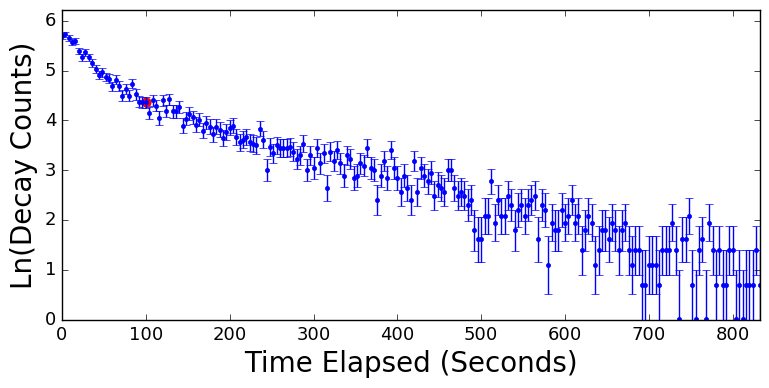

In [43]:
plt.figure(figsize=(9,4))
plt.scatter(icut*4,LnC[icut],color='red',s=40)
plt.errorbar(t, LnC, yerr=dLnC,ls="None",marker='.');
plt.xlim(0,np.max(t));
plt.ylim(0,np.max(LnC) + 0.5)
plt.xlabel('Time Elapsed (Seconds)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);
#plt.savefig('TwoSample')

### #3

In [44]:
def myfun(t,C_o,tau):
    ans = np.log(C_o) - t/tau  # this is y, "the function to be fit"
    return ans

In [45]:
p02 = [80,5*60]

In [46]:
xlots2 = np.linspace(icut*4,np.max(t))  # need lots of data points for smooth curve

plsq, pcov = curve_fit(myfun, t[icut:], LnC[icut:], p02, dLnC[icut:])  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C_o2 = plsq[0]
dC_o2 = np.sqrt(pcov[0,0])
tau2 = plsq[1]
dtau2 = np.sqrt(pcov[1,1])


yfit2 = myfun(xlots2,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('C_o = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('tau = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))

C_o = 113 +/- 4
tau = 217.4 +/- 4.4


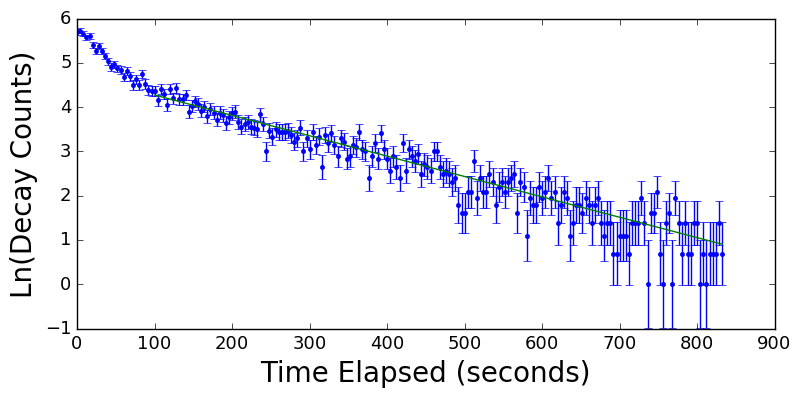

In [47]:
plt.figure(figsize=(9,4))
plt.errorbar(t, LnC, yerr=dLnC,ls="None",marker='.');
plt.xlabel('Time Elapsed (seconds)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(xlots2,yfit2);

### #4

In [48]:
def LongLivedCounts(t):
    return C_o2*np.exp(-t/tau2)

In [49]:
ShortLivedCounts = CorrectData[0:icut] - LongLivedCounts(t[0:icut])

ShortLivedCounts = ShortLivedCounts[0:-4] #Some entries in background

LnSLC = np.log(ShortLivedCounts)

dLnSLC = np.array([1/np.sqrt(entry) for entry in ShortLivedCounts])

In [50]:
ShortLivedCounts.shape

(21,)

In [51]:
t[0:icut].shape

(25,)

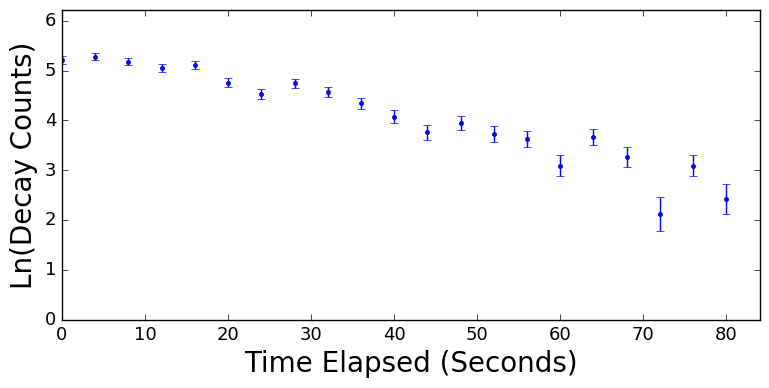

In [52]:
plt.figure(figsize=(9,4))
plt.errorbar(t[0:len(LnSLC)], LnSLC, yerr=dLnSLC,ls="None",marker='.');
plt.xlim(0,len(LnSLC)*4);
plt.ylim(0,np.max(LnC) + 0.5)
plt.xlabel('Time Elapsed (Seconds)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);

In [53]:
p03 = [ShortLivedCounts[0],60]

In [54]:
xlots3 = np.linspace(0,len(LnSLC)*4)  # need lots of data points for smooth curve

plsq, pcov = curve_fit(myfun, t[0:len(LnSLC)], LnSLC[0:len(LnSLC)], p03, dLnSLC[0:len(LnSLC)])  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C_o3 = plsq[0]
dC_o3 = np.sqrt(pcov[0,0])
tau3 = plsq[1]
dtau3 = np.sqrt(pcov[1,1])


yfit3 = myfun(xlots3,plsq[0],plsq[1])  # use fit results for a, b, c
    
print('C_o = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('tau = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))

C_o = 225 +/- 13
tau = 31.7 +/- 1.9


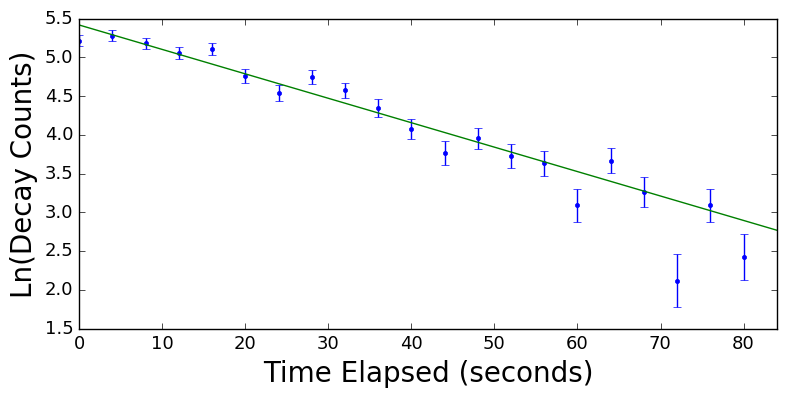

In [55]:
plt.figure(figsize=(9,4))
plt.errorbar(t[0:len(LnSLC)], LnSLC, yerr=dLnSLC,ls="None",marker='.');
plt.xlabel('Time Elapsed (seconds)',size=20);
plt.ylabel('Ln(Decay Counts)',size=20);
plt.xticks(size = 13);
plt.xlim(0,len(LnSLC)*4);
plt.yticks(size = 13);
plt.plot(xlots3,yfit3);

### #5

From wiki, the half life of Silver-108 is 2.37 minutes and From wiki, the half life of Silver-110 is 24.6 seconds

### #6

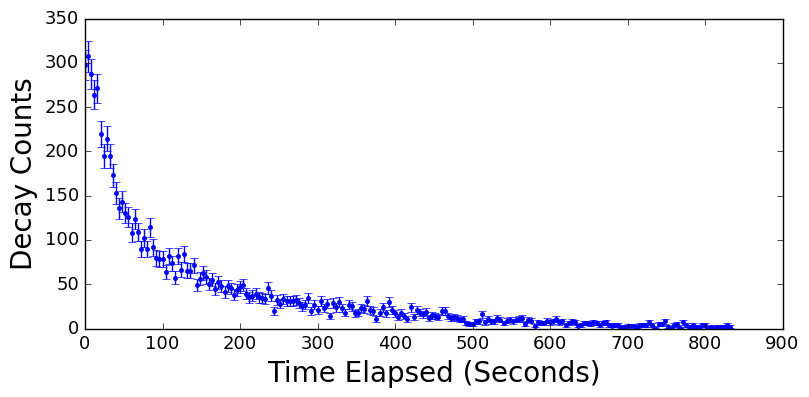

In [56]:
plt.figure(figsize=(9,4))
plt.errorbar(t, CorrectData, yerr=dCorrectData,ls="None",marker='.');
plt.xlabel('Time Elapsed (Seconds)',size=20);
plt.ylabel('Decay Counts',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);

In [57]:
def myfun2(t,C_o2,tau2,C_o3,tau3):
    ans = C_o2*np.exp(-t/tau2) + C_o3*np.exp(-t/tau3)  # this is y, "the function to be fit"
    return ans

In [58]:
p04 = [C_o2,tau2,C_o3,tau3]

In [59]:
xlots4 = np.linspace(0,np.max(t))  # need lots of data points for smooth curve

plsq, pcov = curve_fit(myfun2, t, CorrectData, p04, dCorrectData)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C_o22 = plsq[0]
dC_o22 = np.sqrt(pcov[0,0])
tau33 = plsq[1]
dtau33 = np.sqrt(pcov[1,1])


yfit4 = myfun2(xlots4,plsq[0],plsq[1],plsq[2],plsq[3])  # use fit results for a, b, c
    
print('C_o2 = %.0f +/- %.0f' % (plsq[0], np.sqrt(pcov[0,0])))
print('tau2 = %.1f +/- %.1f' % (plsq[1], np.sqrt(pcov[1,1])))
print('C_o3 = %.0f +/- %.0f' % (plsq[2], np.sqrt(pcov[2,2])))
print('tau3 = %.1f +/- %.1f' % (plsq[3], np.sqrt(pcov[3,3])))

C_o2 = 110 +/- 5
tau2 = 206.3 +/- 5.3
C_o3 = 219 +/- 10
tau3 = 34.5 +/- 2.5


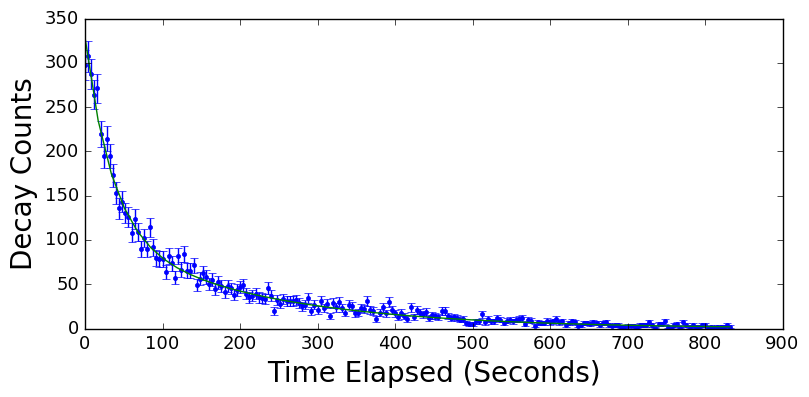

In [60]:
plt.figure(figsize=(9,4))
plt.errorbar(t, CorrectData, yerr=dCorrectData,ls="None",marker='.');
plt.xlabel('Time Elapsed (Seconds)',size=20);
plt.ylabel('Decay Counts',size=20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(xlots4,yfit4);